In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from segmented_upper_hull import segmented_upper_hull
from scipy.spatial import ConvexHull

In [2]:
data = pd.read_csv('dummy_spectrum.csv')

In [3]:
wavelengths = data['wavelengths'].values
reflectance = data['reflectance'].values

## compute the segmented upper hull

In [4]:
results = segmented_upper_hull(reflectance, wavelengths, return_type="all") # returns dict of outputs. See docstring for details

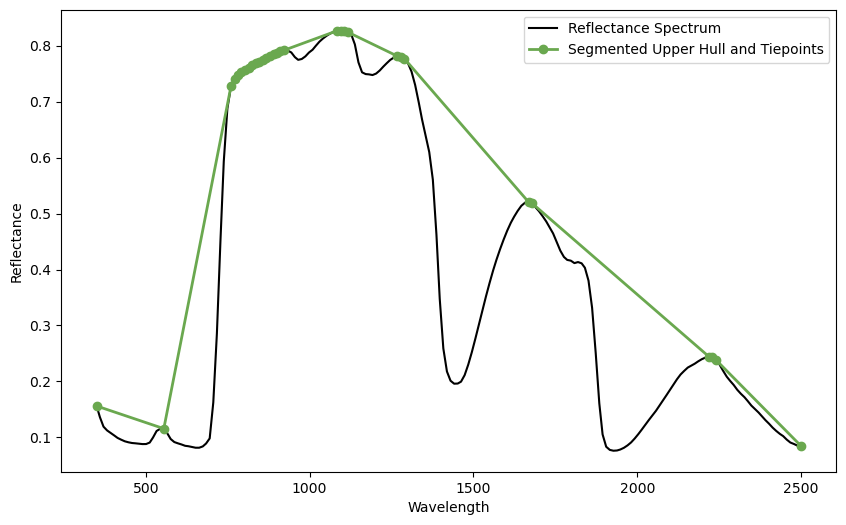

In [5]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, reflectance, color="#000000", label='Reflectance Spectrum')
plt.plot(results["hull"][:,0], results["hull"][:,1], 'o-', color="#6aa84f", linewidth=2, label='Segmented Upper Hull and Tiepoints')
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.legend()
plt.show()

### Note on processing spectral libraries
The function allows for row-wise application i.e.:
    df.apply(lambda row: segmented_upper_hull(row.values, wavelengths=wavelengths, return_type='band_depth'),
    axis=1,
    result_type='expand')

Its easiest to specify single array outputs like 'band_depth' in this case.

## compute upper convex hull for comparison

In [6]:
from scipy.spatial import ConvexHull

# compute convex hull
points = np.column_stack((wavelengths, reflectance))
hull = ConvexHull(points)

# Extract upper hull only
hull_vertices = hull.vertices
hull_points = points[hull_vertices]

# Sort by wavelength and filter upper hull
hull_points = hull_points[np.argsort(hull_points[:, 0])]
upper_mask = np.ones(len(hull_points), dtype=bool)
upper_mask[1:-1] = hull_points[1:-1, 1] >= np.interp(hull_points[1:-1, 0],
                                                       [hull_points[0, 0], hull_points[-1, 0]],
                                                       [hull_points[0, 1], hull_points[-1, 1]])
upper_hull = hull_points[upper_mask]

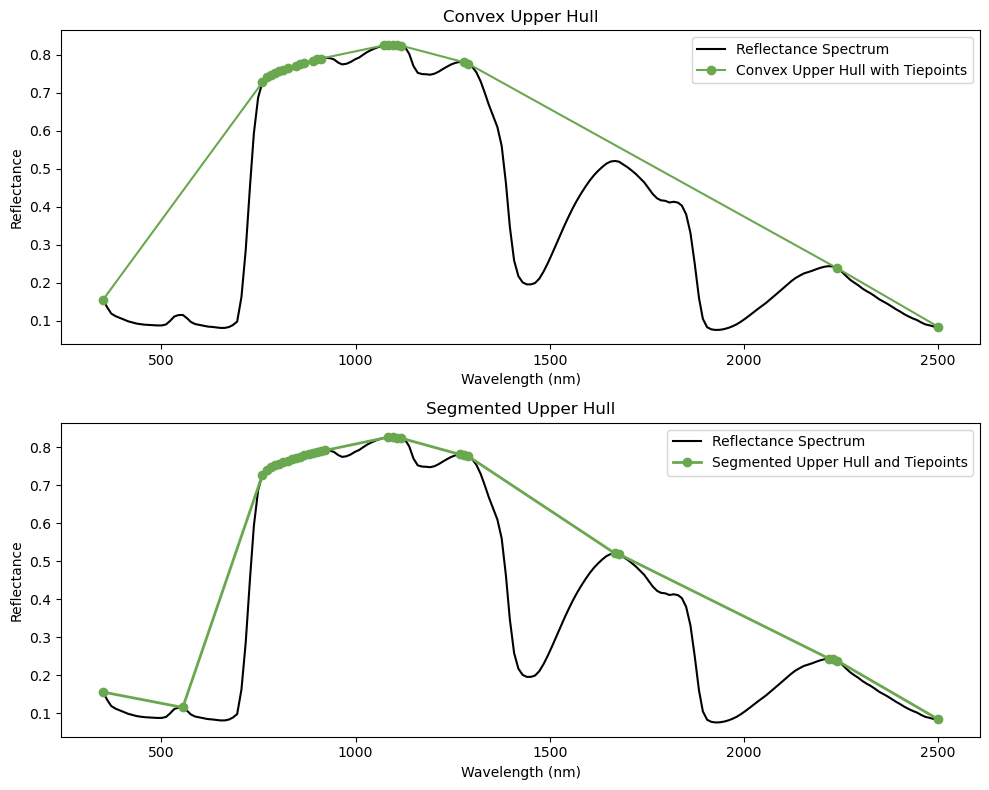

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))  # 2 rows, 1 column

# Example plots
axes[0].plot(wavelengths, reflectance, color="#000000", label='Reflectance Spectrum')
axes[0].plot(upper_hull[:, 0], upper_hull[:, 1],  'o-', color="#6aa84f", label='Convex Upper Hull with Tiepoints')
axes[0].set_xlabel('Wavelength (nm)')
axes[0].set_ylabel('Reflectance')
axes[0].set_title("Convex Upper Hull")
axes[0].legend()

axes[1].plot(wavelengths, reflectance, color="#000000", label='Reflectance Spectrum')
axes[1].plot(results["hull"][:,0], results["hull"][:,1], 'o-', color="#6aa84f", linewidth=2, label='Segmented Upper Hull and Tiepoints')
axes[1].set_xlabel('Wavelength (nm)')
axes[1].set_ylabel('Reflectance')
axes[1].set_title("Segmented Upper Hull")
axes[1].legend()

plt.tight_layout()
plt.show()